In [1]:
# Import dependencies
from pprint import pprint
import pandas as pd 
import requests
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

import gmaps
import os
import json
import time
from config import g_key

In [33]:
merged_clean = pd.read_csv('data/yelp_inspection_merge.csv')
merged_clean.head()


,Unnamed: 0.1,Address,Address_old,AKA Name,Facility Type,Risk,Zip,Year,Inspection Type,Results,...,display_address,address1,address2,address3,city,latitude,longitude,zip code,restaurant_id,price_integer
0,0,4412 N Pulaski Rd,4412 N Pulaski Rd,WENDY'S,Restaurant,Risk 1 (High),60630.0,2022,Complaint Re-Inspection,Pass,...,"['4412 N Pulaski Rd', 'Chicago, IL 60630']",4412 N Pulaski Rd,NaN,NaN,Chicago,41.961428,-87.728149,60630,NztYcb9i_D9E563x1XVUsQ,1.0
1,1,4412 N Pulaski Rd,4412 N Pulaski Rd,WENDY'S,Restaurant,Risk 1 (High),60630.0,2022,Short Form Complaint,Fail,...,"['4412 N Pulaski Rd', 'Chicago, IL 60630']",4412 N Pulaski Rd,NaN,NaN,Chicago,41.961428,-87.728149,60630,NztYcb9i_D9E563x1XVUsQ,1.0
2,2,1116 W Madison St,1116 W Madison St,VietFive Coffee,Restaurant,Risk 2 (Medium),60607.0,2022,License Re-Inspection,Pass,...,"['1116 W Madison St', 'Chicago, IL 60607']",1116 W Madison St,NaN,NaN,Chicago,41.881840,-87.655100,60607,zrgjSslmZzgmF6H4ZU3HxA,NaN
3,3,1116 W Madison St,1116 W Madison St,VietFive Coffee,Restaurant,Risk 2 (Medium),60607.0,2022,License,Fail,...,"['1116 W Madison St', 'Chicago, IL 60607']",1116 W Madison St,NaN,NaN,Chicago,41.881840,-87.655100,60607,zrgjSslmZzgmF6H4ZU3HxA,NaN
4,4,2132 W Chicago,2132 W Chicago,TAKIE OUTIT,Restaurant,Risk 1 (High),60622.0,2022,License Re-Inspection,Pass,...,"['2132 W Chicago Ave', 'Chicago, IL 60622']",2132 W Chicago Ave,NaN,NaN,Chicago,41.896110,-87.680860,60622,rd4NrLcEOKBVaGRIkC35NQ,1.0


In [34]:
pf = merged_clean["Year"].unique()
pf

array([2022])

# Failed

In [3]:
#DataFrame for Restaurant with Failed Status
failed_df = merged_clean.loc[merged_clean["Results"] == "Fail"]

In [7]:
fail = pd.DataFrame(failed_df, columns = ['name','review_count','category','category_title','Risk', 'price_integer',
                                                'rating', 'Year', 'zip code_y','address1','price','Inspection Type','Results','Violations','Latitude','Longitude'])
#fail.head(5)


In [8]:
#create link for gmaps
gmaps.configure(api_key = g_key)

In [9]:
# configure gmaps for lat/lng vs rating based on . Store latitude and longitude in locations
locations_f = fail[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = fail["rating"].astype(float)

In [10]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations_f, weights=rating, 
                                 dissipating=False, max_intensity=300,
                                 point_radius=50)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
#configure a map with all the points
figure = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure)

#Add markers
markers = gmaps.marker_layer(locations_f)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [31]:
f = failed_df["Year"].unique()
f

array([2022])

# Passing DataFrame

In [12]:
#DataFrame for Restaurant with Passed Status
passed_df = merged_clean.loc[merged_clean["Results"] == "Pass"]
pass_df = pd.DataFrame(passed_df, columns = ['name','review_count','category','category_title','Risk', 'price_integer',
                                                'rating', 'Year', 'zip code_y','address1','price','Inspection Type','Results','Violations','Latitude','Longitude'])
#pass_df.head(5)

Heat Map Rating with Lat/Lng: use Latitude, Longitude and Rating as weight

In [13]:
#configure gmaps for lat/lng vs rating

# Store latitude and longitude in locations
locations = pass_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = pass_df["rating"].astype(float)

In [14]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=100)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

Marker Map of Pass: use Latitude, Longitude

In [15]:
#configure a map with all the points
locations_p = pass_df[["Latitude", "Longitude"]]

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

#Add markers
markers = gmaps.marker_layer(locations_p)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

Price vs Year ScatterPlot

In [27]:
pass_df['price_integer'].replace('', np.nan, inplace=True)
pass_df.dropna(subset=['price_integer'], inplace=True)
p = pass_df["Year"].unique()
p

array([2022])

In [22]:

x_values = pass_df["Year"]
y_values = pass_df["price_integer"]


/Users/annepizzini/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/annepizzini/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


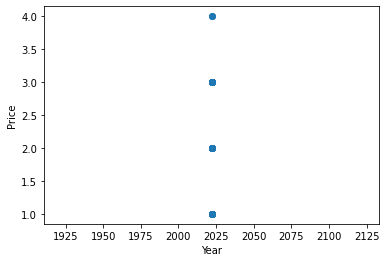

In [23]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

# Pass vs Fail in Bar Chart

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Passed = pass_df['name'].count()
Failed = failed_df['name'].count()
print(Passed)
print(Failed)

In [ ]:
result = ["Pass", "Fail"] 
count = [441,184]
res_df = pd.DataFrame({"Result": result,"Count": count})
res_df


In [ ]:

# Generate a pie plot showing the distribution of pass vs fail

colors = ["lightblue","orange"]

plot = res_df.plot.pie(y="Count", labels=("Pass","Fail"), figsize=(7,5), colors = colors, autopct="%1.1f%%",
                             startangle=140,)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig('images/pass_fail.png')
plt.show()